<a href="https://colab.research.google.com/github/SebaDiezV/Challenge_TelecomX_Parte2_AluraLatam/blob/main/TelecomX_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X - Parte 2**
##**Challenge de Alura Latam y Oracle para el curso de DataScience**

## **01 -  Preparación de los datos**

###**Exportar bibliotécas**

In [1]:
import pandas as pd
import numpy as np

### **Extracción de archivo tratado**

In [2]:
datos = pd.read_csv('/content/datos_tratados.csv')

In [3]:
datos.head()

,id_cliente,cancelacion_cliente,genero,adulto_mayor,pareja,dependiente,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_online,metodo_pago,mensualidad,total,cuentas_diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Sí,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Sí,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Sí,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7043 non-null   object 
 1   cancelacion_cliente      7043 non-null   object 
 2   genero                   7043 non-null   object 
 3   adulto_mayor             7043 non-null   int64  
 4   pareja                   7043 non-null   int64  
 5   dependiente              7043 non-null   int64  
 6   meses_contrato           7043 non-null   int64  
 7   servicio_telefonico      7043 non-null   int64  
 8   lineas_multiples         7043 non-null   object 
 9   servicio_internet        7043 non-null   object 
 10  seguridad_online         7043 non-null   object 
 11  respaldo_online          7043 non-null   object 
 12  proteccion_dispositivos  7043 non-null   object 
 13  soporte_tecnico          7043 non-null   object 
 14  tv_streaming            

In [5]:
datos.apply(pd.unique)

,0
id_cliente,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
cancelacion_cliente,"[No, Sí]"
genero,"[Female, Male]"
adulto_mayor,"[0, 1]"
pareja,"[1, 0]"
dependiente,"[1, 0]"
meses_contrato,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
servicio_telefonico,"[1, 0]"
lineas_multiples,"[No, Yes, No phone service]"
servicio_internet,"[DSL, Fiber optic, No]"


In [6]:
datos['cancelacion_cliente'] = datos['cancelacion_cliente'].apply(lambda x: x.replace('Sí','1').replace('No','0'))
datos['genero'] = datos['genero'].apply(lambda x: x.replace('Male','1').replace('Female','0'))
datos.sample(3)

,id_cliente,cancelacion_cliente,genero,adulto_mayor,pareja,dependiente,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_online,metodo_pago,mensualidad,total,cuentas_diarias
591,0869-PAPRP,0,0,1,1,0,26,1,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,1,Credit card (automatic),85.7,2067.00,2.86
1957,2834-JKOOW,0,0,0,0,0,15,0,No phone service,DSL,...,Yes,Yes,No,No,One year,0,Mailed check,45.9,693.45,1.53
1008,1455-HFBXA,0,1,0,1,0,52,1,Yes,Fiber optic,...,Yes,Yes,No,No,Two year,1,Credit card (automatic),91.6,4627.80,3.05


In [7]:
datos[['cancelacion_cliente','genero']] = datos[['cancelacion_cliente','genero']].astype(np.int64)

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7043 non-null   object 
 1   cancelacion_cliente      7043 non-null   int64  
 2   genero                   7043 non-null   int64  
 3   adulto_mayor             7043 non-null   int64  
 4   pareja                   7043 non-null   int64  
 5   dependiente              7043 non-null   int64  
 6   meses_contrato           7043 non-null   int64  
 7   servicio_telefonico      7043 non-null   int64  
 8   lineas_multiples         7043 non-null   object 
 9   servicio_internet        7043 non-null   object 
 10  seguridad_online         7043 non-null   object 
 11  respaldo_online          7043 non-null   object 
 12  proteccion_dispositivos  7043 non-null   object 
 13  soporte_tecnico          7043 non-null   object 
 14  tv_streaming            

### **Eliminación de Columnas Irrelevantes**

In [9]:
datos.columns

Index(['id_cliente', 'cancelacion_cliente', 'genero', 'adulto_mayor', 'pareja',
       'dependiente', 'meses_contrato', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'tipo_contrato',
       'factura_online', 'metodo_pago', 'mensualidad', 'total',
       'cuentas_diarias'],
      dtype='object')

In [10]:
datos = datos.drop(columns =['id_cliente'])

In [11]:
datos.head(2)

,cancelacion_cliente,genero,adulto_mayor,pareja,dependiente,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,seguridad_online,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_online,metodo_pago,mensualidad,total,cuentas_diarias
0,0,0,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.19
1,0,1,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,2.00


###**Verificación de la Proporción de Cancelación (Churn)**

In [12]:
datos['cancelacion_cliente'].value_counts()

,count
cancelacion_cliente,
0,5174
1,1869


In [13]:
datos['cancelacion_cliente'].value_counts(normalize=True).round(4)*100

,proportion
cancelacion_cliente,
0,73.46
1,26.54


##**02 - Selección de Variables**

###**Análisis Dirigido**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [15]:
def custom_legend_name(new_names):
    for i, new_name in enumerate(new_names):
        fig.data[i].name = new_name

fig = px.box(datos, x = 'meses_contrato', color = 'cancelacion_cliente')
custom_legend_name(['No','Sí'])
fig.show()

In [16]:
datos.groupby('cancelacion_cliente')['meses_contrato'].mean().round(2)

,meses_contrato
cancelacion_cliente,
0,37.57
1,17.98


In [17]:
fig = px.box(datos, x = 'total', color = 'cancelacion_cliente')
custom_legend_name(['No','Sí'])
fig.show()

In [18]:
datos.groupby('cancelacion_cliente')['total'].mean().round(2)

,total
cancelacion_cliente,
0,2549.91
1,1531.80


In [191]:
fig = px.box(datos, x = 'mensualidad', color = 'cancelacion_cliente')
custom_legend_name(['No','Sí'])
fig.show()

In [192]:
datos.groupby('cancelacion_cliente')['mensualidad'].mean().round(2)

,mensualidad
cancelacion_cliente,
0,61.27
1,74.44


In [193]:
fig = px.box(datos, x = 'meses_contrato', color = 'cancelacion_cliente')
custom_legend_name(['No','Sí'])
fig.show()

In [194]:
datos.groupby('cancelacion_cliente')['meses_contrato'].mean().round(2)

,meses_contrato
cancelacion_cliente,
0,37.57
1,17.98


##**03 - Modelado Predictivo**

### **Encoding**

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
one_hot = make_column_transformer((OneHotEncoder(drop= 'if_binary'),
                                   ['lineas_multiples', 'servicio_internet','seguridad_online'
                                   , 'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico',
                                    'tv_streaming', 'peliculas_streaming', 'tipo_contrato', 'metodo_pago']),
                                  remainder = 'passthrough',
                                  sparse_threshold= 0,
                                  force_int_remainder_cols=False)

In [21]:
one_hot_first = make_column_transformer((OneHotEncoder(drop= 'first'),
                                   ['lineas_multiples', 'servicio_internet','seguridad_online'
                                   , 'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico',
                                    'tv_streaming', 'peliculas_streaming', 'tipo_contrato', 'metodo_pago']),
                                  remainder = 'passthrough',
                                  sparse_threshold= 0,
                                  force_int_remainder_cols=False)

In [22]:
datos_ohe = one_hot.fit_transform(datos)
datos_ohe = pd.DataFrame(datos_ohe, columns = one_hot.get_feature_names_out())
datos_ohe

,onehotencoder__lineas_multiples_No,onehotencoder__lineas_multiples_No phone service,onehotencoder__lineas_multiples_Yes,onehotencoder__servicio_internet_DSL,onehotencoder__servicio_internet_Fiber optic,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_No,onehotencoder__seguridad_online_No internet service,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_No,...,remainder__genero,remainder__adulto_mayor,remainder__pareja,remainder__dependiente,remainder__meses_contrato,remainder__servicio_telefonico,remainder__factura_online,remainder__mensualidad,remainder__total,remainder__cuentas_diarias
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30,2.19
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40,2.00
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85,2.46
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85,3.27
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90,1.84
7039,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70,2.84
7040,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75,1.68
7041,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65,2.26


In [23]:
datos_ohe_first = one_hot_first.fit_transform(datos)
datos_ohe_first = pd.DataFrame(datos_ohe_first, columns = one_hot_first.get_feature_names_out())
datos_ohe_first

,onehotencoder__lineas_multiples_No phone service,onehotencoder__lineas_multiples_Yes,onehotencoder__servicio_internet_Fiber optic,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_No internet service,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_No internet service,onehotencoder__respaldo_online_Yes,onehotencoder__proteccion_dispositivos_No internet service,onehotencoder__proteccion_dispositivos_Yes,...,remainder__genero,remainder__adulto_mayor,remainder__pareja,remainder__dependiente,remainder__meses_contrato,remainder__servicio_telefonico,remainder__factura_online,remainder__mensualidad,remainder__total,remainder__cuentas_diarias
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30,2.19
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40,2.00
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85,2.46
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85,3.27
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90,1.84
7039,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70,2.84
7040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75,1.68
7041,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65,2.26


###**Análisis de Correlación**

In [29]:
numericas = datos.select_dtypes(include='number')

correlaciones = numericas.corr()['cancelacion_cliente'].sort_values(ascending=False)
print(correlaciones)

cancelacion_cliente    1.000000
cuentas_diarias        0.193412
mensualidad            0.193356
factura_online         0.191825
adulto_mayor           0.150889
servicio_telefonico    0.011942
genero                -0.008612
pareja                -0.150448
dependiente           -0.164221
total                 -0.198324
meses_contrato        -0.352229
Name: cancelacion_cliente, dtype: float64


In [25]:
corr = datos_ohe.corr()
corr['remainder__cancelacion_cliente'].sort_values(ascending=False)

,remainder__cancelacion_cliente
remainder__cancelacion_cliente,1.000000
onehotencoder__tipo_contrato_Month-to-month,0.405103
onehotencoder__seguridad_online_No,0.342637
onehotencoder__soporte_tecnico_No,0.337281
onehotencoder__servicio_internet_Fiber optic,0.308020
onehotencoder__metodo_pago_Electronic check,0.301919
onehotencoder__respaldo_online_No,0.268005
onehotencoder__proteccion_dispositivos_No,0.252481
remainder__cuentas_diarias,0.193412
remainder__mensualidad,0.193356


###**Separación de Datos**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = datos_ohe.drop(columns=['remainder__cancelacion_cliente'])
y = datos_ohe['remainder__cancelacion_cliente']

In [32]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, stratify=y,  test_size=0.30, random_state=30)


In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, stratify=y_temp,  random_state=30)

In [34]:
X_first = datos_ohe_first.drop(columns=['remainder__cancelacion_cliente'])
y_first = datos_ohe_first['remainder__cancelacion_cliente']

In [35]:
X_temp_first, X_test_first, y_temp_first, y_test_first = train_test_split(X_first, y_first, stratify=y_first,  test_size=0.30, random_state=30)


In [36]:
X_train_first, X_val_first, y_train_first, y_val_first = train_test_split(X_temp_first, y_temp_first, stratify=y_temp_first, random_state=30)

###**Balanceo de Clases (opcional)**

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_train_res_first, y_train_res_first = smote.fit_resample(X_train_first, y_train_first)

###**Normalización o Estandarización (si es necesario)**

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
normalizacion = MinMaxScaler()
X_res_norm = normalizacion.fit_transform(X_train_res_first)

In [41]:
pd.DataFrame(X_res_norm)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,1.000000,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.847222,1.0,1.0,0.854011,0.747347,0.856287
1,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,1.000000,...,0.000000,0.00000,0.000000,0.000000,1.000000,1.0,0.0,0.681116,0.738911,0.682635
2,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.125000,0.0,0.0,0.224215,0.041818,0.224551
3,0.0,0.000000,1.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.000000,...,0.000000,1.00000,1.000000,0.000000,0.541667,1.0,0.0,0.805680,0.451218,0.805389
4,0.0,1.000000,1.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.694444,1.0,0.0,0.899851,0.652832,0.901198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,0.0,0.000000,0.0,1.0,1.0,0.000000,1.0,0.000000,1.0,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.088196,1.0,0.0,0.013590,0.017225,0.013024
5428,0.0,1.000000,1.0,0.0,0.0,1.000000,0.0,1.000000,0.0,1.000000,...,0.009120,0.00912,1.000000,0.009120,0.570078,1.0,1.0,0.949002,0.534588,0.950922
5429,0.0,1.000000,1.0,0.0,0.0,0.000000,0.0,0.459806,0.0,0.000000,...,0.540194,0.00000,0.540194,0.540194,0.208333,1.0,1.0,0.586747,0.129080,0.587895
5430,0.0,0.230487,1.0,0.0,0.0,0.769513,0.0,0.230487,0.0,0.769513,...,0.000000,0.00000,0.769513,0.000000,0.069444,1.0,1.0,0.708400,0.052879,0.708423


###**Creación de Modelos**

####**Baseline**

In [42]:
from sklearn.dummy import DummyClassifier

In [43]:
dummy = DummyClassifier(strategy='most_frequent', random_state=30)
dummy.fit(X_train_res, y_train_res)
dummy.score(X_val, y_val)


0.7347931873479319

####**DecisionTree**

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
modelo_tree = DecisionTreeClassifier(max_depth=10, random_state=30, min_samples_split=5, min_samples_leaf=3)
modelo_tree.fit(X_train_res, y_train_res)

print(f'la exactitud del modelo con el conjunto de entrenamiento es de {modelo_tree.score(X_train_res, y_train_res)}')
print(f'la exactitud del modelo con el conjunto de validación es de {modelo_tree.score(X_val, y_val)}')

la exactitud del modelo con el conjunto de entrenamiento es de 0.895618556701031
la exactitud del modelo con el conjunto de validación es de 0.7558799675587997


Para mayor precisión se utilizará el metodo de validación cruzada

In [46]:
from sklearn.model_selection import KFold, cross_validate

In [47]:
kf = KFold(n_splits= 5, shuffle= True, random_state= 30 )
cv_resultados_tree = cross_validate(modelo_tree, X_train_res,y_train_res, cv=kf, scoring='recall')
cv_resultados_tree

{'fit_time': array([0.06191278, 0.04729939, 0.05690742, 0.04246926, 0.04407525]),
 'score_time': array([0.00840926, 0.00887895, 0.00547886, 0.00532198, 0.00589299]),
 'test_score': array([0.85340314, 0.82442748, 0.77449168, 0.83180987, 0.82862524])}

In [48]:
print("Recall medio:", cv_resultados_tree['test_score'].mean())

Recall medio: 0.8225514823563348


####**RandomForestClassifier**





In [49]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
modelo_forest = RandomForestClassifier(max_depth= 15, random_state=30, class_weight='balanced', n_estimators=200, min_samples_split=5)
modelo_forest.fit(X_train_res, y_train_res)

print(f'la exactitud del modelo con el conjunto de entrenamiento es de {modelo_forest.score(X_train_res, y_train_res)}')
print(f'la exactitud del modelo con el conjunto de validación es de {modelo_forest.score(X_val, y_val)}')

la exactitud del modelo con el conjunto de entrenamiento es de 0.9583946980854198
la exactitud del modelo con el conjunto de validación es de 0.7842660178426601


In [53]:
cv_resultados_forest = cross_validate(modelo_forest, X_train_res,y_train_res, cv=kf, scoring='recall')
cv_resultados_forest

{'fit_time': array([2.41654015, 1.43279719, 1.43288207, 1.7587378 , 1.86228275]),
 'score_time': array([0.04730844, 0.04581881, 0.0509398 , 0.06123137, 0.04648185]),
 'test_score': array([0.85689354, 0.86259542, 0.83733826, 0.85009141, 0.84369115])}

In [54]:
print("Recall medio:", cv_resultados_forest['test_score'].mean())

Recall medio: 0.850121956307156


####**KNN**

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
modelo_knn = KNeighborsClassifier(n_neighbors=5)

In [58]:
modelo_knn.fit(X_res_norm, y_train_res_first)

KNeighborsClassifier()

In [59]:
X_val_first_norm = normalizacion.transform(X_val_first)

In [60]:
modelo_knn.score(X_val_first_norm, y_val_first)

0.681265206812652

####**Regresión Logística**

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
modelo_regression = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=30)

In [63]:
modelo_regression.fit(X_res_norm, y_train_res_first)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=30)

In [64]:
modelo_regression.score(X_val_first_norm, y_val_first)

0.7526358475263585

###**Evaluación de los Modelos**

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, PrecisionRecallDisplay


####**Evaluación DecisionTree**

In [163]:
def evaluar_modelo(modelo, X, y_true):
  y_prev = modelo.predict(X)


  print('\nReporte de Clasificación:')
  print(classification_report(y_true, y_prev))
  print('Matriz de Confusión:')
  print(confusion_matrix(y_true, y_prev))
  visualizacion_cm = ConfusionMatrixDisplay(confusion_matrix(y_true, y_prev),
                                            display_labels = ['No', 'Sí'])
  visualizacion_cm.plot();


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83       906
         1.0       0.54      0.55      0.54       327

    accuracy                           0.76      1233
   macro avg       0.69      0.69      0.69      1233
weighted avg       0.76      0.76      0.76      1233

Matriz de Confusión:
[[753 153]
 [148 179]]


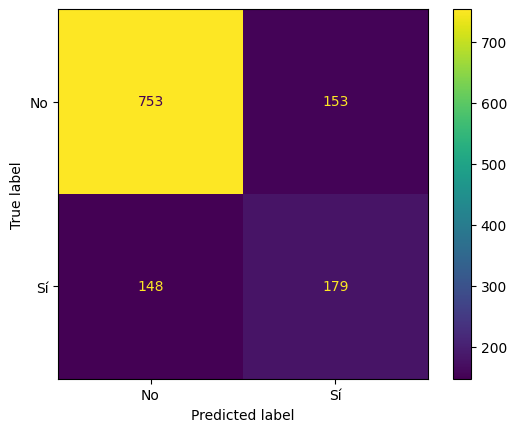

In [159]:
evaluar_modelo(modelo_tree, X_val, y_val)

####**Evaluación RandomForest**


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       906
         1.0       0.61      0.53      0.57       327

    accuracy                           0.78      1233
   macro avg       0.72      0.70      0.71      1233
weighted avg       0.78      0.78      0.78      1233

Matriz de Confusión:
[[794 112]
 [154 173]]


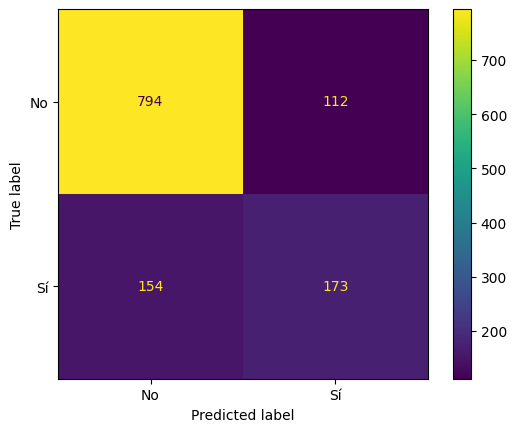

In [160]:
evaluar_modelo(modelo_forest, X_val, y_val)

####**Evaluación KNN**


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75       906
         1.0       0.44      0.75      0.56       327

    accuracy                           0.68      1233
   macro avg       0.66      0.70      0.65      1233
weighted avg       0.76      0.68      0.70      1233

Matriz de Confusión:
[[594 312]
 [ 81 246]]


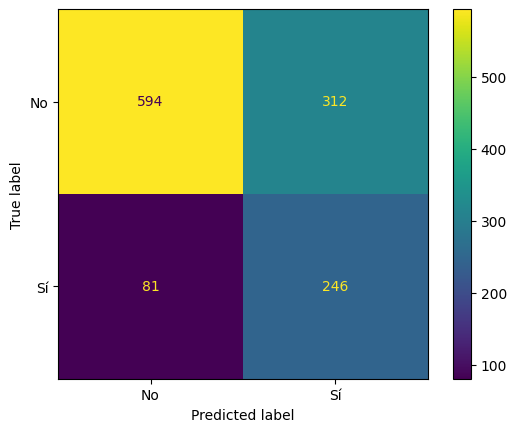

In [161]:
evaluar_modelo(modelo_knn, X_val_first_norm, y_val_first)

####**Evaluación Regresión Logística**


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.90      0.74      0.82       906
         1.0       0.52      0.78      0.63       327

    accuracy                           0.75      1233
   macro avg       0.71      0.76      0.72      1233
weighted avg       0.80      0.75      0.77      1233

Matriz de Confusión:
[[673 233]
 [ 72 255]]


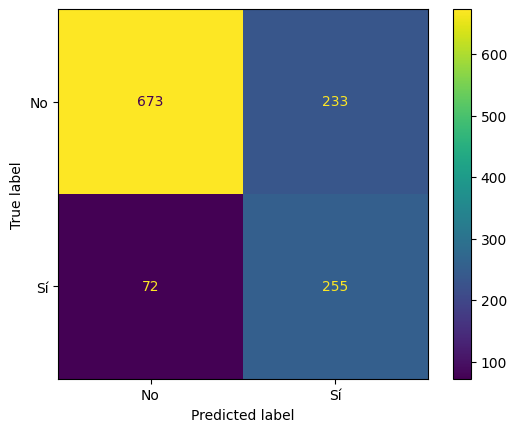

In [162]:
evaluar_modelo(modelo_regression, X_val_first_norm, y_val_first)

###**Segunda evaluación ajustando el umbral de decisión**

In [164]:
#Estableciendo nuevo umbral
def evaluar_modelo_umbral(modelo, X, y_true, umbral= 0.3):
  y_proba = modelo.predict_proba(X)[:,1]
  y_prev =(y_proba >= umbral).astype(int)

  print("\nReporte de Clasificación:")
  print(classification_report(y_true, y_prev, digits=2))
  print("Matriz de Confusión:")
  print(confusion_matrix(y_true, y_prev))
  visualizacion_cm = ConfusionMatrixDisplay(confusion_matrix(y_true, y_prev),
                                            display_labels = ['No', 'Sí'])
  visualizacion_cm.plot();


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.86      0.72      0.79       906
         1.0       0.47      0.69      0.56       327

    accuracy                           0.71      1233
   macro avg       0.67      0.70      0.67      1233
weighted avg       0.76      0.71      0.72      1233

Matriz de Confusión:
[[652 254]
 [103 224]]


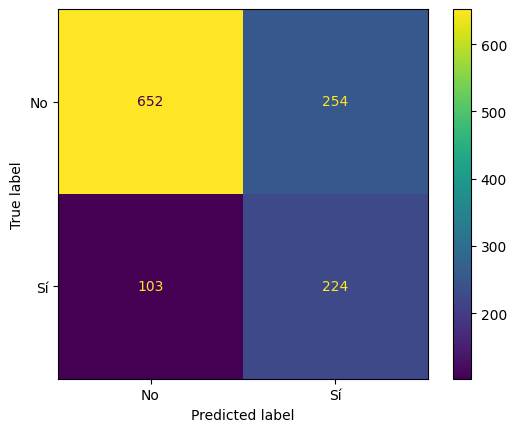

In [165]:
evaluar_modelo_umbral(modelo_tree, X_val, y_val, umbral=0.3)


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.89      0.73      0.80       906
         1.0       0.50      0.75      0.60       327

    accuracy                           0.73      1233
   macro avg       0.69      0.74      0.70      1233
weighted avg       0.79      0.73      0.75      1233

Matriz de Confusión:
[[658 248]
 [ 81 246]]


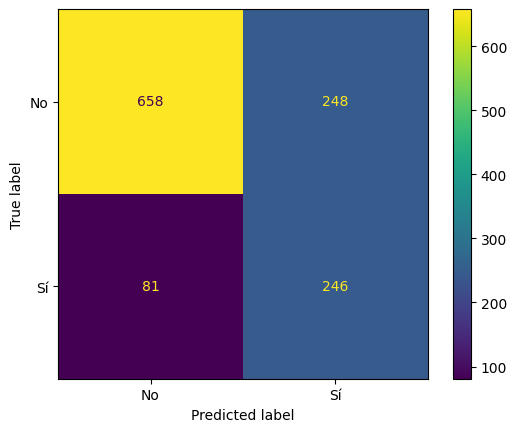

In [166]:
evaluar_modelo_umbral(modelo_forest, X_val, y_val, umbral=0.3)


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.91      0.52      0.66       906
         1.0       0.39      0.85      0.53       327

    accuracy                           0.61      1233
   macro avg       0.65      0.69      0.60      1233
weighted avg       0.77      0.61      0.63      1233

Matriz de Confusión:
[[471 435]
 [ 49 278]]


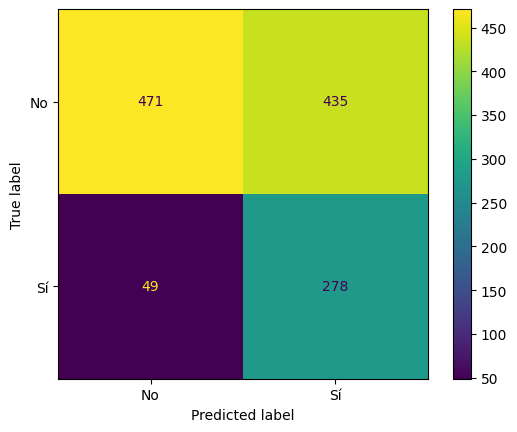

In [167]:
evaluar_modelo_umbral(modelo_knn, X_val_first_norm, y_val_first, umbral=0.3)


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71       906
         1.0       0.43      0.90      0.58       327

    accuracy                           0.66      1233
   macro avg       0.69      0.74      0.65      1233
weighted avg       0.81      0.66      0.68      1233

Matriz de Confusión:
[[518 388]
 [ 32 295]]


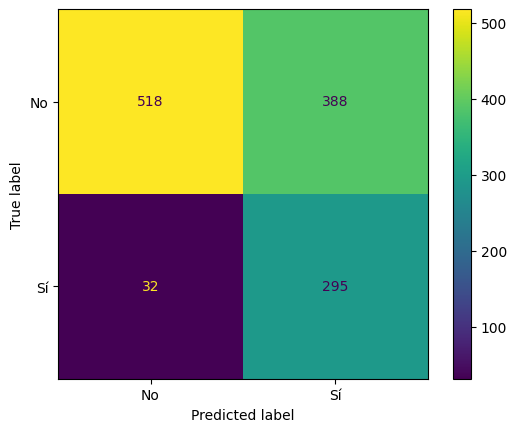

In [168]:
evaluar_modelo_umbral(modelo_regression, X_val_first_norm, y_val_first, umbral=0.3)

## **04 - Interpretación del Modelo: Importancia de Variables**

### **Regresión Logística: Coeficientes**

In [185]:
X_res_norm_df = pd.DataFrame(X_res_norm, columns=X_train_res_first.columns)

coeficientes = modelo_regression.coef_[0]

# Asociar nombres legibles
importancia_logreg = pd.DataFrame({
    'Variable': X_res_norm_df.columns,
    'Coeficiente Absoluto': coeficientes,
    'Impacto': np.abs(coeficientes)
}).sort_values(by='Coeficiente Absoluto', ascending=False).head(10)

display(importancia_logreg)

,Variable,Coeficiente Absoluto,Impacto
2,onehotencoder__servicio_internet_Fiber optic,0.976379,0.976379
29,remainder__total,0.802939,0.802939
1,onehotencoder__lineas_multiples_Yes,0.507972,0.507972
27,remainder__factura_online,0.429685,0.429685
13,onehotencoder__tv_streaming_Yes,0.385492,0.385492
15,onehotencoder__peliculas_streaming_Yes,0.355567,0.355567
19,onehotencoder__metodo_pago_Electronic check,0.297223,0.297223
0,onehotencoder__lineas_multiples_No phone service,0.260147,0.260147
22,remainder__adulto_mayor,0.242301,0.242301
21,remainder__genero,0.114414,0.114414


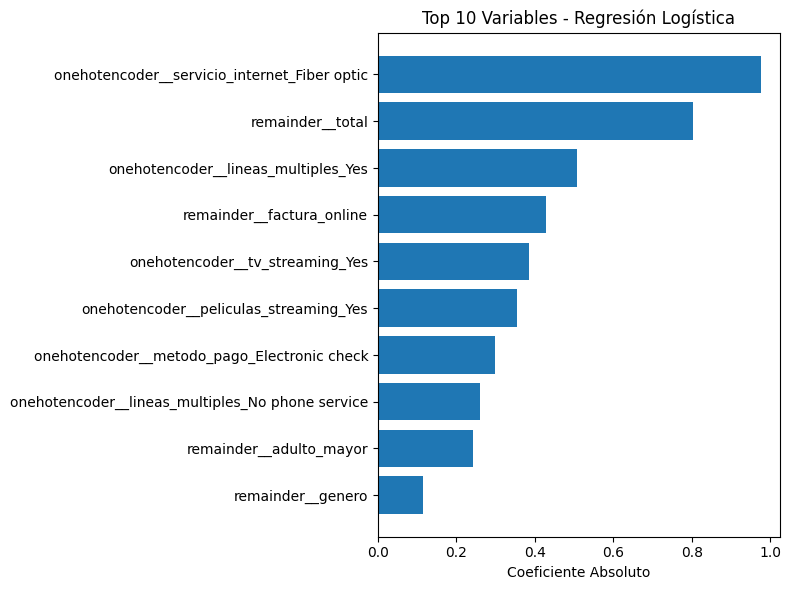

In [187]:
plt.figure(figsize=(8, 6))
plt.barh(importancia_logreg['Variable'], importancia_logreg['Coeficiente Absoluto'])
plt.title('Top 10 Variables - Regresión Logística')
plt.xlabel('Coeficiente Absoluto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **KNN: Variables más discriminantes (SelectKBest)**

In [175]:
# Obtener índices y distancias de los vecinos más cercanos del primer punto del set
distancias, indices = modelo_knn.kneighbors([X_res_norm_df.iloc[0]], n_neighbors=5)

# Mostrar los vecinos
vecinos = X_res_norm_df.iloc[indices[0]]
vecinos['Clase_real'] = y_train_res.iloc[indices[0]].values

print("Vecinos más cercanos:")
display(vecinos)

Vecinos más cercanos:


/tmp/ipython-input-997812747.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,onehotencoder__lineas_multiples_No phone service,onehotencoder__lineas_multiples_Yes,onehotencoder__servicio_internet_Fiber optic,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_No internet service,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_No internet service,onehotencoder__respaldo_online_Yes,onehotencoder__proteccion_dispositivos_No internet service,onehotencoder__proteccion_dispositivos_Yes,...,remainder__adulto_mayor,remainder__pareja,remainder__dependiente,remainder__meses_contrato,remainder__servicio_telefonico,remainder__factura_online,remainder__mensualidad,remainder__total,remainder__cuentas_diarias,Clase_real
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.0,0.847222,1.0,1.000000,0.854011,0.747347,0.856287,0.0
3488,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.0,0.805556,1.0,1.000000,0.891878,0.736846,0.892216,0.0
5307,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.985215,0.0,0.985215,...,0.0,0.014785,0.0,0.655242,1.0,0.985215,0.875354,0.596587,0.877141,1.0
1812,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,1.0,0.000000,0.0,0.986111,1.0,1.000000,0.873443,0.875215,0.874251,0.0
2657,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.0,1.000000,1.0,1.000000,0.863976,0.877816,0.865269,0.0


In [176]:
muestra = X_res_norm_df.iloc[0]
muestra_df = pd.DataFrame(muestra).T
muestra_df['Clase_real'] = y_train_res.iloc[0]

# Comparar muestra vs vecinos
comparacion = pd.concat([muestra_df, vecinos], axis=0)
comparacion.index = ['Muestra'] + [f'Vecino {i+1}' for i in range(len(vecinos))]

display(comparacion)

,onehotencoder__lineas_multiples_No phone service,onehotencoder__lineas_multiples_Yes,onehotencoder__servicio_internet_Fiber optic,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_No internet service,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_No internet service,onehotencoder__respaldo_online_Yes,onehotencoder__proteccion_dispositivos_No internet service,onehotencoder__proteccion_dispositivos_Yes,...,remainder__adulto_mayor,remainder__pareja,remainder__dependiente,remainder__meses_contrato,remainder__servicio_telefonico,remainder__factura_online,remainder__mensualidad,remainder__total,remainder__cuentas_diarias,Clase_real
Muestra,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.0,0.847222,1.0,1.000000,0.854011,0.747347,0.856287,0.0
Vecino 1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.0,0.847222,1.0,1.000000,0.854011,0.747347,0.856287,0.0
Vecino 2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.0,0.805556,1.0,1.000000,0.891878,0.736846,0.892216,0.0
Vecino 3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.985215,0.0,0.985215,...,0.0,0.014785,0.0,0.655242,1.0,0.985215,0.875354,0.596587,0.877141,1.0
Vecino 4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,1.0,0.000000,0.0,0.986111,1.0,1.000000,0.873443,0.875215,0.874251,0.0
Vecino 5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.0,1.000000,1.0,1.000000,0.863976,0.877816,0.865269,0.0


### **Random Forest: Importancia de variables por impureza**




In [189]:
importancias = modelo_forest.feature_importances_
variables = X_train.columns

df_importancia_rf = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False).head(10)

df_importancia_rf_top10 = df_importancia_rf.head(10)

display(df_importancia_rf_top10)

,Variable,Importancia
24,onehotencoder__tipo_contrato_Month-to-month,0.115050
35,remainder__meses_contrato,0.084115
39,remainder__total,0.075269
29,onehotencoder__metodo_pago_Electronic check,0.074914
6,onehotencoder__seguridad_online_No,0.074075
15,onehotencoder__soporte_tecnico_No,0.063529
38,remainder__mensualidad,0.047957
40,remainder__cuentas_diarias,0.045722
9,onehotencoder__respaldo_online_No,0.039046
8,onehotencoder__seguridad_online_Yes,0.028387


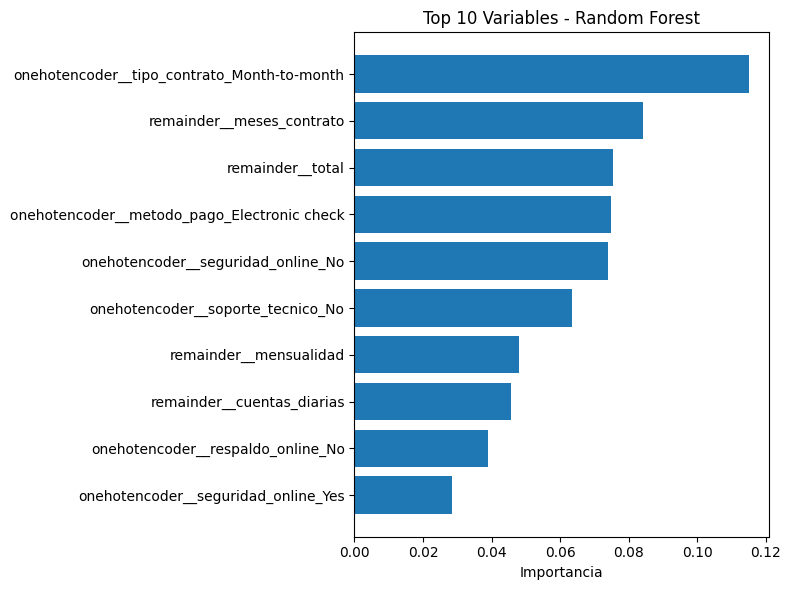

In [190]:
plt.figure(figsize=(8, 6))
plt.barh(df_importancia_rf['Variable'], df_importancia_rf['Importancia'])
plt.title('Top 10 Variables - Random Forest')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **DecisionTree: Importancia de variables por impureza**


In [179]:
importancias_tree = modelo_tree.feature_importances_
variables = X_train.columns

# Crear DataFrame de importancias
df_importancia_tree = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancias_tree
}).sort_values(by='Importancia', ascending=False)

# Mostrar solo las 10 más importantes
df_importancia_tree_top10 = df_importancia_tree.head(10)

display(df_importancia_tree_top10)

,Variable,Importancia
24,onehotencoder__tipo_contrato_Month-to-month,0.443511
6,onehotencoder__seguridad_online_No,0.126718
39,remainder__total,0.080335
29,onehotencoder__metodo_pago_Electronic check,0.076837
35,remainder__meses_contrato,0.049050
38,remainder__mensualidad,0.032238
15,onehotencoder__soporte_tecnico_No,0.022566
40,remainder__cuentas_diarias,0.018901
2,onehotencoder__lineas_multiples_Yes,0.017025
37,remainder__factura_online,0.015906


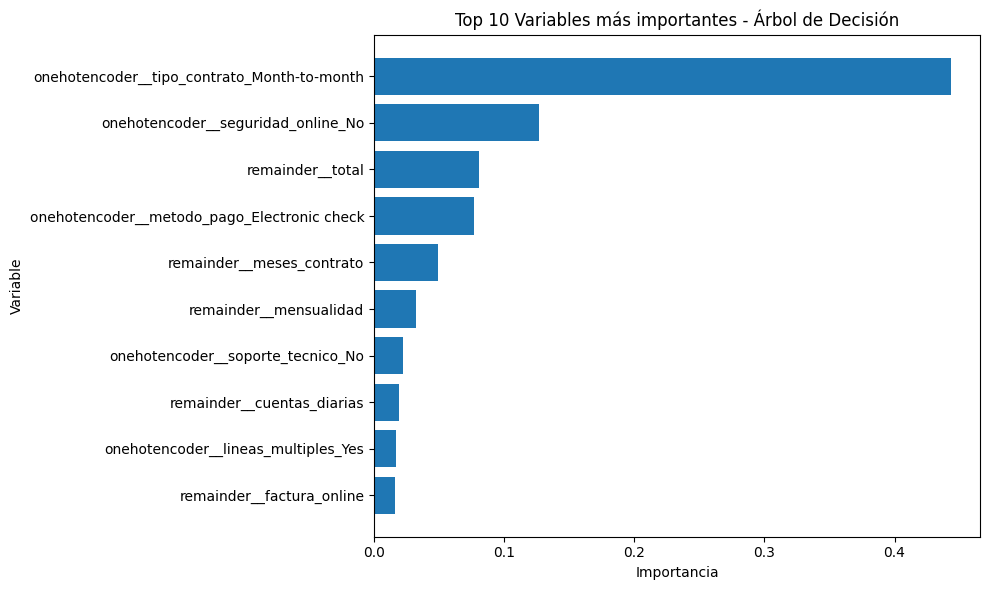

In [180]:

plt.figure(figsize=(10, 6))
plt.barh(df_importancia_tree_top10['Variable'], df_importancia_tree_top10['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Top 10 Variables más importantes - Árbol de Decisión')
plt.gca().invert_yaxis()  # Para que la más importante aparezca arriba
plt.tight_layout()
plt.show()
